In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.cluster import KMeans

									
	Variable	Data type	Range	Description					
	ID	numerical	Integer	Shows a unique identificator of a customer.					
									
	Sex	categorical	{0,1}	Biological sex (gender) of a customer. In this dataset there are only 2 different options.					
			0	male					
			1	female					
									
	Marital status	categorical	{0,1}	Marital status of a customer.					
			0	single					
			1	non-single (divorced / separated / married / widowed)					
									
	Age	numerical	Integer	The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset					
			18	Min value (the lowest age observed in the dataset)					
			76	Max value (the highest age observed in the dataset)					
									
	Education	categorical	{0,1,2,3}	Level of education of the customer					
			0	other / unknown					
			1	high school					
			2	university					
			3	graduate school					
									
	Income	numerical	Real	Self-reported annual income in US dollars of the customer.					
			35832	Min value (the lowest income observed in the dataset)					
			309364	Max value (the highest income observed in the dataset)					
									
	Occupation	categorical	{0,1,2}	Category of occupation of the customer.					
			0	unemployed / unskilled					
			1	skilled employee / official					
			2	management / self-employed / highly qualified employee / officer					
									
	Settlement size	categorical	{0,1,2}	The size of the city that the customer lives in.					
			0	small city					
			1	mid-sized city					
			2	big city					


In [63]:
df = pd.read_csv('data/segmentation data.csv')
df = df.drop('ID',axis=1)
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [64]:
df.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

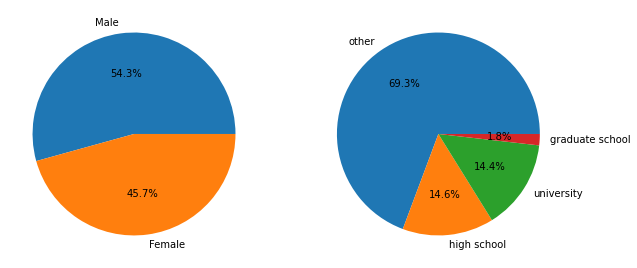

In [65]:
fig = plt.figure(figsize =(10, 7))
ax1 = fig.add_subplot(121)

labels1 =['Male','Female']
size1=df.Sex.value_counts()
plt.pie(size1, labels = labels1 , autopct='%1.1f%%')

ax2 = fig.add_subplot(122)
labels2 =['other','high school','university','graduate school']
size2=df.Education.value_counts()
plt.pie(size2, labels = labels2 , autopct='%1.1f%%')

plt.show()

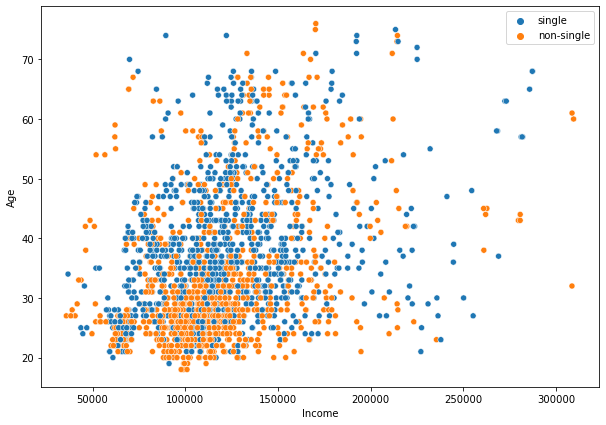

In [66]:
fig = plt.figure(figsize =(10, 7))
ax=sns.scatterplot(data=df,x='Income', y='Age',hue='Marital status')
legend_labels,_=ax.get_legend_handles_labels()
ax.legend(legend_labels,['single','non-single'])
plt.show()

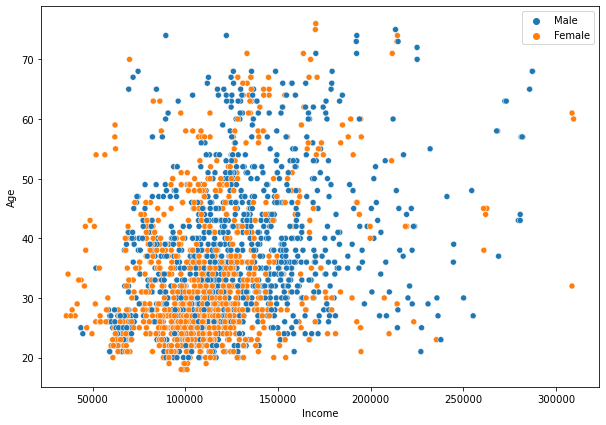

In [67]:
fig = plt.figure(figsize =(10, 7))
ax=sns.scatterplot(data=df,x='Income', y='Age',hue='Sex')
legend_labels,_=ax.get_legend_handles_labels()
ax.legend(legend_labels,['Male','Female'])
plt.show()

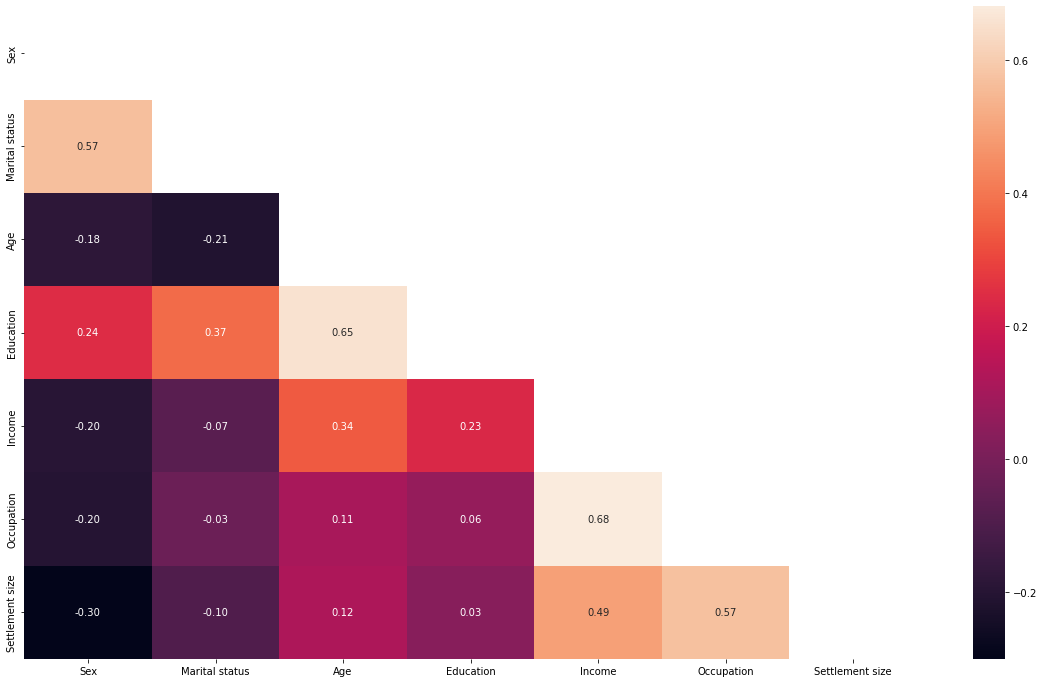

In [68]:
plt.figure(figsize = (20, 12))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask,  annot = True, fmt = ".2f")
plt.show()

In [69]:
num_columns = ['Age','Income']
cat_columns = ['Sex','Marital status','Education','Occupation','Settlement size']

df[cat_columns] = df[cat_columns].astype('str')

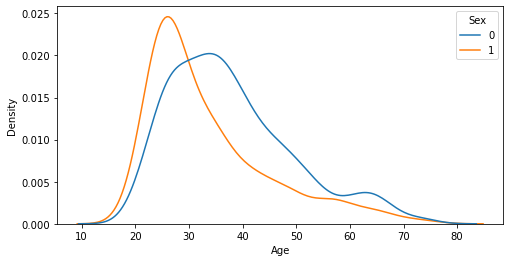

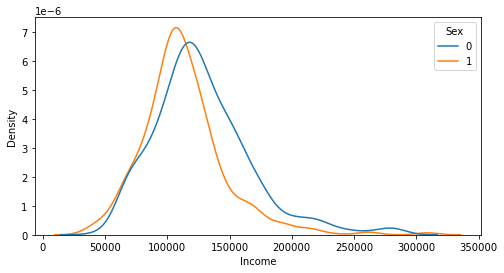

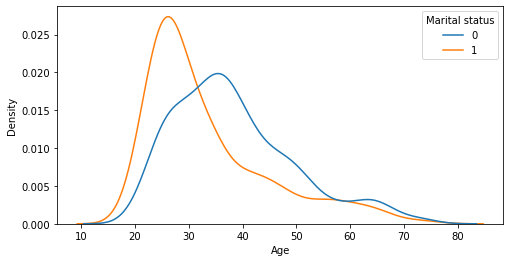

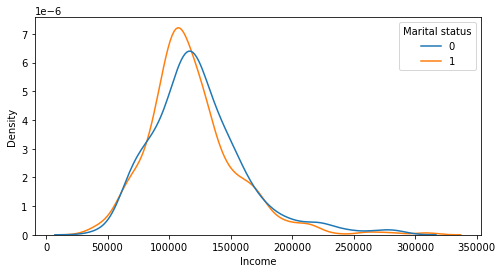

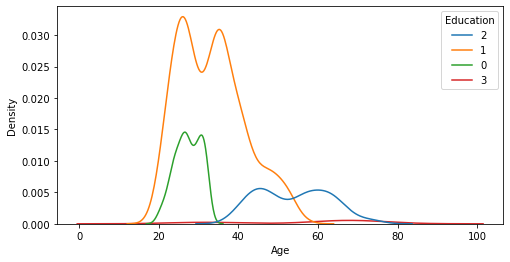

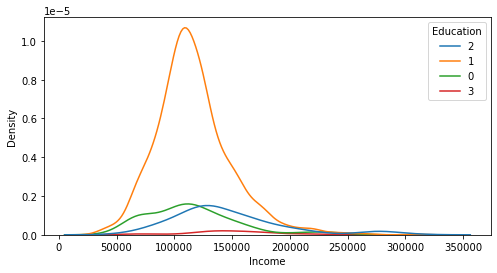

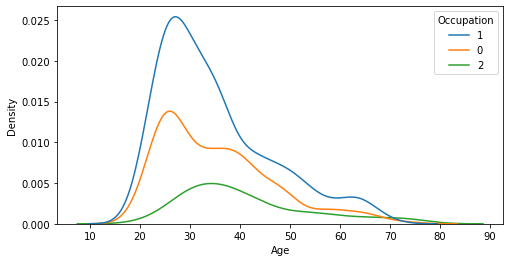

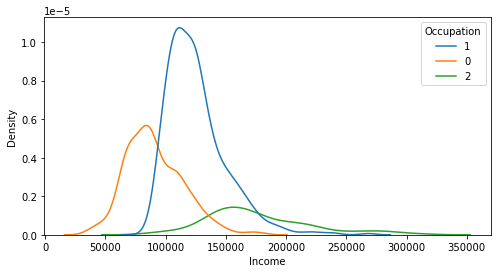

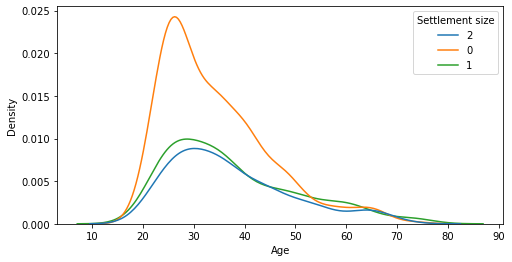

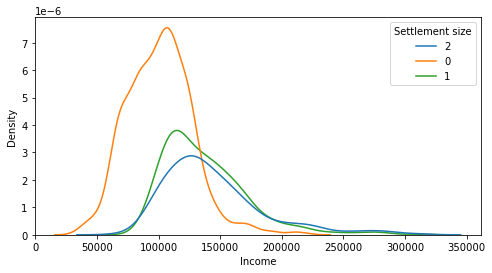

In [70]:
for category in cat_columns:
    for numerical in num_columns:
        plt.figure(figsize=(8,4))
        sns.kdeplot(data=df, x=numerical, hue=category)

In [72]:
X = df[['Age','Income']]

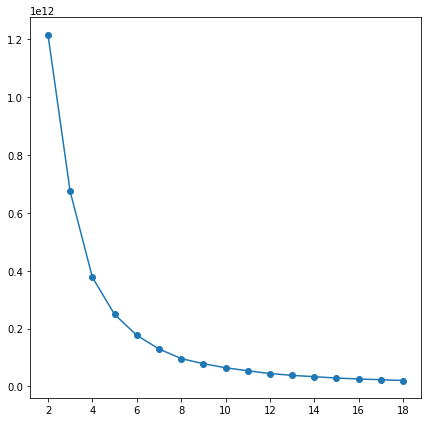

In [73]:
clusters_range=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
inertias=[]

for c in clusters_range:
    kmeans=KMeans(n_clusters=c, random_state=0).fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,7))
plt.plot(clusters_range,inertias, marker='o')

In [149]:
k_means_labels = kmeans.labels_
k_means_labels

array([12,  9, 17, ..., 17,  7, 11])

In [80]:
k_means_cluster_centers = kmeans.cluster_centers_
k_means_cluster_centers

array([[4.29651163e+01, 1.67222616e+05],
       [3.40446429e+01, 1.15055844e+05],
       [3.59351852e+01, 7.92828981e+04],
       [3.39000000e+01, 2.38839000e+05],
       [3.87846154e+01, 1.43522338e+05],
       [3.25000000e+01, 4.69340000e+04],
       [5.45833333e+01, 2.89313917e+05],
       [3.03212435e+01, 9.77960415e+04],
       [4.42926829e+01, 1.95302561e+05],
       [4.02644628e+01, 1.54733215e+05],
       [4.40000000e+01, 2.16799667e+05],
       [2.92773723e+01, 6.68412993e+04],
       [3.78189300e+01, 1.24193568e+05],
       [4.78181818e+01, 2.64232000e+05],
       [3.25370370e+01, 1.06787996e+05],
       [3.96951220e+01, 1.33519463e+05],
       [4.20816327e+01, 1.78461408e+05],
       [3.25683453e+01, 8.86858345e+04]])

In [131]:
X['label'] = k_means_labels

C:\Users\lenovo\AppData\Local\Temp/ipykernel_3752/2653370202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['label'] = k_means_labels


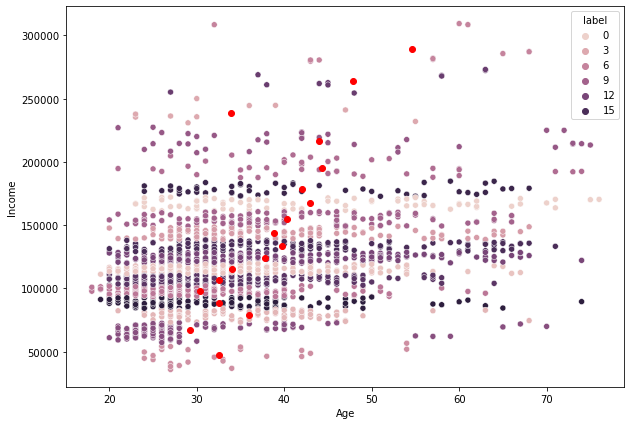

In [139]:
plt.figure(figsize=(10,7))
sns.scatterplot(x= X['Age'], y= X['Income'], hue= X['label'] )
plt.scatter(k_means_cluster_centers[:,0],k_means_cluster_centers[:,1], color = 'r')
plt.show()

#### K = 6

In [147]:
kmeans2=KMeans(n_clusters=6, random_state=0).fit(X)
k_means_labels2 = kmeans2.labels_
X['label2'] = k_means_labels2
k_means_cluster_centers2 = kmeans2.cluster_centers_

C:\Users\lenovo\AppData\Local\Temp/ipykernel_3752/617751204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['label2'] = k_means_labels2


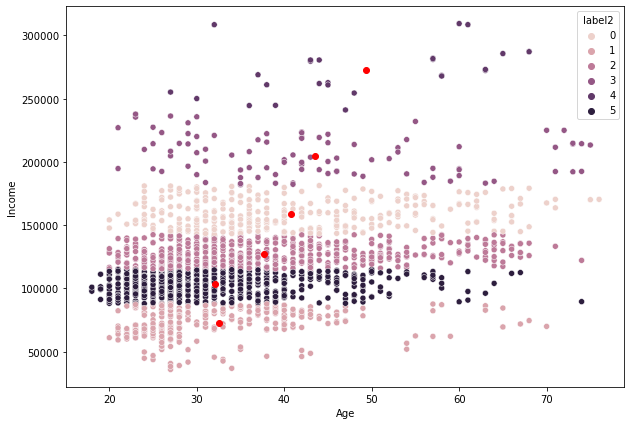

In [148]:
plt.figure(figsize=(10,7))
sns.scatterplot(x= X['Age'], y= X['Income'], hue= X['label2'] )
plt.scatter(k_means_cluster_centers2[:,0],k_means_cluster_centers2[:,1], color = 'r')
plt.show()